In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint
# regressions
from scipy.stats import linregress

# Import API key
from api_keys_jkeme import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# linear modelling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# # Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

648

# Perform API Calls

In [3]:
cities[10:15]

['benguela', 'cazaje', 'yellowknife', 'mar del plata', 'kapaa']

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [5]:
# Build query URL and request your results in Celsius
city = "atuona"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()

200


In [6]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 18},
 'cod': 200,
 'coord': {'lat': -9.8, 'lon': -139.0333},
 'dt': 1650734904,
 'id': 4020109,
 'main': {'feels_like': 78.91,
          'grnd_level': 1006,
          'humidity': 75,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 78.91,
          'temp_max': 78.91,
          'temp_min': 78.91},
 'name': 'Atuona',
 'sys': {'country': 'PF', 'sunrise': 1650727179, 'sunset': 1650769728},
 'timezone': -34200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 86, 'gust': 14.83, 'speed': 14.14}}


In [7]:
## Pull the Data required in the assignment readme

In [8]:
# To determine the weather_json data type
type(weather_json)

dict

In [9]:
# To pull the keys in the API call
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [10]:
# Create the list to store our data
cloudiness = weather_json["clouds"]["all"]
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]
date_dt = weather_json["dt"]
humidity = weather_json["main"]['humidity']
pressure = weather_json["main"]['pressure']
temp = weather_json["main"]['temp_max']
city_name = weather_json["name"]
country = weather_json["sys"]["country"]
wind = weather_json["wind"]["speed"]

In [11]:
# Create loop to run through "cities"
lats = []
lngs = []
countries = []
clouds = []
dates = []
names = []
winds = []
temps = []
pressures = []
humids = []

for city in cities[0:622]:
    
    # Make request of the City
    print(city)
    
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    print(weather_response.status_code)
    print()
    
    # Try catch for errors
    try:
        # get data
        weather_json = weather_response.json()

        # parse the data
        cloudiness = weather_json["clouds"]["all"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        date_dt = weather_json["dt"]
        humidity = weather_json["main"]['humidity']
        pressure = weather_json["main"]['pressure']
        temp = weather_json["main"]['temp_max']
        city_name = weather_json["name"]
        country = weather_json["sys"]["country"]
        wind = weather_json["wind"]["speed"]

        # Add to lists
        lats.append(lat)
        lngs.append(lng)
        countries.append(country)
        clouds.append(cloudiness)
        dates.append(date_dt)
        names.append(city_name)
        winds.append(wind)
        temps.append(temp)
        pressures.append(pressure)
        humids.append(humidity)
            
    except Exception as e:
        print(e)
        
        # Add NULL Values to lists
        lats.append(np.nan)
        lngs.append(np.nan)
        countries.append(None)
        clouds.append(np.nan)
        dates.append(np.nan)
        names.append(city)
        winds.append(np.nan)
        temps.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
        
    time.sleep(1)

aklavik
200

mount gambier
200

niquelandia
200

coquimbo
200

port elizabeth
200

george
200

hermanus
200

punta arenas
200

carnarvon
200

barentsburg
404

'clouds'
benguela
200

cazaje
404

'clouds'
yellowknife
200

mar del plata
200

kapaa
200

mitsamiouli
200

ushuaia
200

sao joao da barra
200

tsihombe
404

'clouds'
porbandar
200

martapura
200

busselton
200

grindavik
200

torbay
200

sirnak
200

linapacan
404

'clouds'
maracacume
200

saint-philippe
200

bluff
200

shache
200

sao gabriel da cachoeira
200

gat
200

victoria
200

cabo san lucas
200

vaini
200

pevek
200

mataura
200

rocha
200

suntar
200

kandi
200

khatanga
200

toliary
404

'clouds'
xuddur
200

atuona
200

karratha
200

miranorte
404

'clouds'
pahrump
200

sur
200

cape town
200

tuktoyaktuk
200

georgetown
200

brae
200

saint george
200

vardo
200

yar-sale
200

guamal
200

ulaangom
200

olinda
200

geraldton
200

clyde river
200

umzimvubu
404

'clouds'
ranapur
200

mehamn
200

gazanjyk
200

waitati
200

port lincoln
200

anadyr
200

hay river
200

vestmanna
200

sendafa
200

nantucket
200

araouane
200

saint-joseph
200

vrede
200

nsanje
200

hurth
200

meyungs
404

'clouds'
bandar-e lengeh
200

umm lajj
200

adrar
200

kambove
200

hermosillo
200

talcahuano
200

atar
200

margate
200

saravena
200

kushmurun
200

woodstock
200

muromtsevo
200

flinders
200

sunamganj
404

'clouds'
vila velha
200

motozintla
200

gweta
200

bardiyah
200

henties bay
200

thinadhoo
200

amarante do maranhao
200

lyubeshiv
404

'clouds'
aurillac
200

najran
200

ushumun
200

shubarkuduk
200

luganville
200

snasa
200

linxia
200

panorama
200

atbasar
200

santa maria
200

aykhal
200

agapovka
200

tabas
200

bonthe
200

ajdabiya
200

naze
200

guisa
200

port augusta
200

sontra
200

nushki
200

honiara
200

chokurdakh
200

rawah
200

brunsbuttel
200

tezu
200

chebarkul
200

verkhniy landekh
200

onguday
200

kangaatsiaq
200

asyut
200

sena madureira
200

general roca
200

tarnogskiy gorodok
200

s

In [12]:
# Create a dataframe to store our data and for future analyses purposes
cities_df = pd.DataFrame()

cities_df["City"] = names
cities_df["Country"] = countries
cities_df["Latitude"] = lats
cities_df["Longitude"] = lngs
cities_df["Date"] = dates
cities_df["Wind_Speed"] = winds
cities_df["Pressure"] = pressures
cities_df["Humidity"] = humids
cities_df["Temperature"] = temps
cities_df["Cloudiness"] = clouds

cities_df.head(10)

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Aklavik,CA,68.2191,-135.0107,1.650735e+09,9.22,1013.0,63.0,23.00,0.0
1,Mount Gambier,AU,-37.8333,140.7667,1.650735e+09,5.75,1032.0,93.0,46.31,0.0
2,Niquelândia,BR,-14.4739,-48.4597,1.650735e+09,5.03,1011.0,38.0,89.44,84.0
3,Coquimbo,CL,-29.9533,-71.3436,1.650735e+09,13.80,1013.0,88.0,58.73,75.0
4,Port Elizabeth,ZA,-33.9180,25.5701,1.650735e+09,3.44,1016.0,96.0,62.31,75.0
5,George,ZA,-33.9630,22.4617,1.650735e+09,2.30,1016.0,94.0,56.75,100.0
6,Hermanus,ZA,-34.4187,19.2345,1.650735e+09,9.78,1018.0,68.0,59.81,31.0
7,Punta Arenas,CL,-53.1500,-70.9167,1.650735e+09,9.22,977.0,87.0,46.42,100.0
8,Carnarvon,AU,-24.8667,113.6333,1.650735e+09,5.75,1012.0,88.0,69.87,0.0
9,barentsburg,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Retrieve cities_df info
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         622 non-null    object 
 1   Country      573 non-null    object 
 2   Latitude     573 non-null    float64
 3   Longitude    573 non-null    float64
 4   Date         573 non-null    float64
 5   Wind_Speed   573 non-null    float64
 6   Pressure     573 non-null    float64
 7   Humidity     573 non-null    float64
 8   Temperature  573 non-null    float64
 9   Cloudiness   573 non-null    float64
dtypes: float64(8), object(2)
memory usage: 48.7+ KB


In [14]:
# Save Data to a CSV file.
cities_df.to_csv("cities_df.csv", index=False)

# Part 2 of the HW

In [15]:
# Load crime data set into pandas
cities_df = pd.read_csv("../WeatherPy/cities_df.csv")
cities_df.head()

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Aklavik,CA,68.2191,-135.0107,1.650735e+09,9.22,1013.0,63.0,23.00,0.0
1,Mount Gambier,AU,-37.8333,140.7667,1.650735e+09,5.75,1032.0,93.0,46.31,0.0
2,Niquelândia,BR,-14.4739,-48.4597,1.650735e+09,5.03,1011.0,38.0,89.44,84.0
3,Coquimbo,CL,-29.9533,-71.3436,1.650735e+09,13.80,1013.0,88.0,58.73,75.0
4,Port Elizabeth,ZA,-33.9180,25.5701,1.650735e+09,3.44,1016.0,96.0,62.31,75.0


In [16]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         622 non-null    object 
 1   Country      568 non-null    object 
 2   Latitude     573 non-null    float64
 3   Longitude    573 non-null    float64
 4   Date         573 non-null    float64
 5   Wind_Speed   573 non-null    float64
 6   Pressure     573 non-null    float64
 7   Humidity     573 non-null    float64
 8   Temperature  573 non-null    float64
 9   Cloudiness   573 non-null    float64
dtypes: float64(8), object(2)
memory usage: 48.7+ KB


## Inspect the data and remove the cities where humidity > 100%

In [17]:
## Find the cities with humidity > 100%. 

In [18]:
# Use the "cities_df.describe()" to find the range of our dataset.

# There is a maximum Humidity value of 100.There are no cities to remove from the dataset.

cities_df.describe()

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
count,573.000000,573.000000,5.730000e+02,573.000000,573.000000,573.000000,573.000000,573.000000
mean,20.539768,19.475448,1.650735e+09,8.117766,1012.895288,69.085515,61.854869,59.226876
std,32.958167,86.902513,2.697420e+02,5.827336,7.971948,23.608358,22.442780,37.769556
min,-54.800000,-175.200000,1.650734e+09,0.000000,977.000000,6.000000,-12.870000,0.000000
25%,-6.416700,-53.806900,1.650735e+09,4.000000,1008.000000,55.000000,48.340000,20.000000
50%,24.700000,24.731400,1.650735e+09,6.890000,1011.000000,74.000000,66.000000,73.000000
75%,48.800200,87.801400,1.650736e+09,11.210000,1017.000000,88.000000,79.200000,99.000000
max,78.218600,179.316700,1.650736e+09,41.380000,1034.000000,100.000000,106.700000,100.000000


In [19]:
# Find the maximum Humidity value of 100.
# In this second line, I removed all rows with NULL values.

mask1 = cities_df.Humidity <= 100
cities_df_sub = cities_df.loc[mask1].dropna().reset_index(drop=True)

In [20]:
cities_df_sub.describe()

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
count,568.000000,568.000000,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000
mean,20.919694,19.515069,1.650735e+09,8.066532,1012.897887,69.156690,61.831268,59.609155
std,32.850904,87.283742,2.702839e+02,5.784387,8.005518,23.599355,22.533877,37.679406
min,-54.800000,-175.200000,1.650734e+09,0.000000,977.000000,6.000000,-12.870000,0.000000
25%,-6.098800,-54.716500,1.650735e+09,4.000000,1008.000000,55.000000,48.142500,21.000000
50%,25.332600,24.943250,1.650735e+09,6.870000,1011.000000,74.000000,66.180000,74.500000
75%,48.945500,89.208375,1.650736e+09,11.057500,1017.000000,88.000000,79.287500,99.000000
max,78.218600,179.316700,1.650736e+09,41.380000,1034.000000,100.000000,106.700000,100.000000


In [21]:
# In this dataframe, this confirms all rows with NULL values are removed.

cities_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         568 non-null    object 
 1   Country      568 non-null    object 
 2   Latitude     568 non-null    float64
 3   Longitude    568 non-null    float64
 4   Date         568 non-null    float64
 5   Wind_Speed   568 non-null    float64
 6   Pressure     568 non-null    float64
 7   Humidity     568 non-null    float64
 8   Temperature  568 non-null    float64
 9   Cloudiness   568 non-null    float64
dtypes: float64(8), object(2)
memory usage: 44.5+ KB


#  Plotting the Data

In [22]:
cities_df.columns

Index(['City', 'Country', 'Latitude', 'Longitude', 'Date', 'Wind_Speed',
       'Pressure', 'Humidity', 'Temperature', 'Cloudiness'],
      dtype='object')

# Latitude vs. Temperature

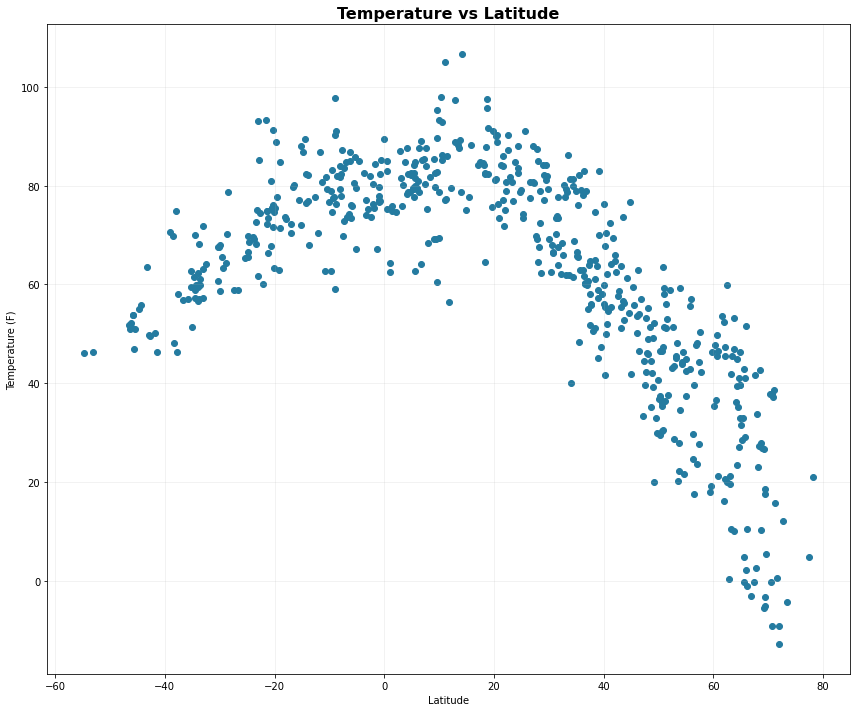

In [23]:
# Latitude vs. Tempertature
plt.figure(figsize=(12,10))

plt.scatter(cities_df.Latitude, cities_df.Temperature, color="#247ba0")

plt.title("Temperature vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.grid(axis="both", alpha=0.2)

plt.tight_layout()
plt.savefig("Lat_V_Temp.png")
plt.show()

As we move away from the equator, measured at 0 Degrees Latitude, the temperature in the city decreases. 

# Latitude vs. Humidity 

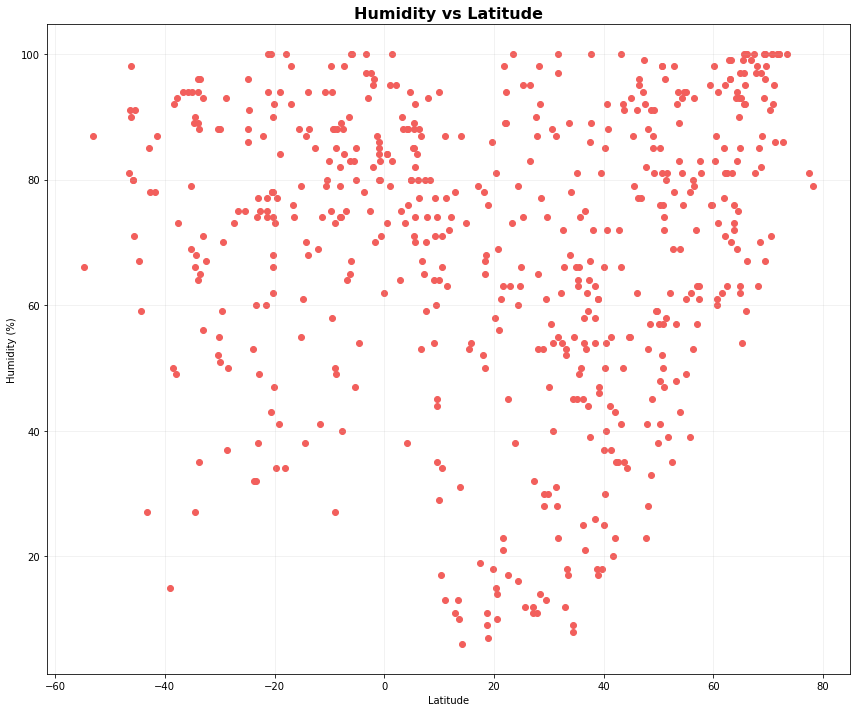

In [24]:
# Latitude vs. Tempertature
plt.figure(figsize=(12,10))

plt.scatter(cities_df.Latitude, cities_df.Humidity, color="#f25f5c")

plt.title("Humidity vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(axis="both", alpha=0.2)

plt.tight_layout()
plt.savefig("Lat_V_Humidity.png")
plt.show()

There is no clear trend in the scatter plot. I do see random clusters in the scatterplot. 

# Latitude vs. Cloudiness

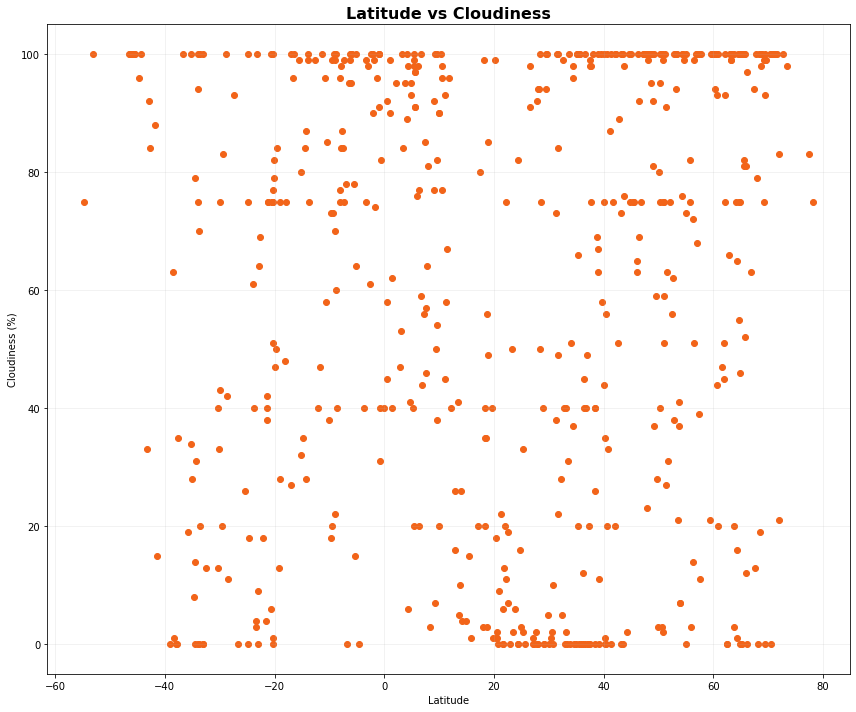

In [25]:
# Latitude vs. Tempertature
plt.figure(figsize=(12,10))

plt.scatter(cities_df.Latitude, cities_df.Cloudiness, color="#F26419")

plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(axis="both", alpha=0.2)

plt.tight_layout()
plt.savefig("Lat_V_Cloudiness.png")
plt.show()

I do not see an observable trend. However, there is no cloudiness at the equator and more cloudiness in the Northern Hemisphere.

# Latitude vs. Windspeed 

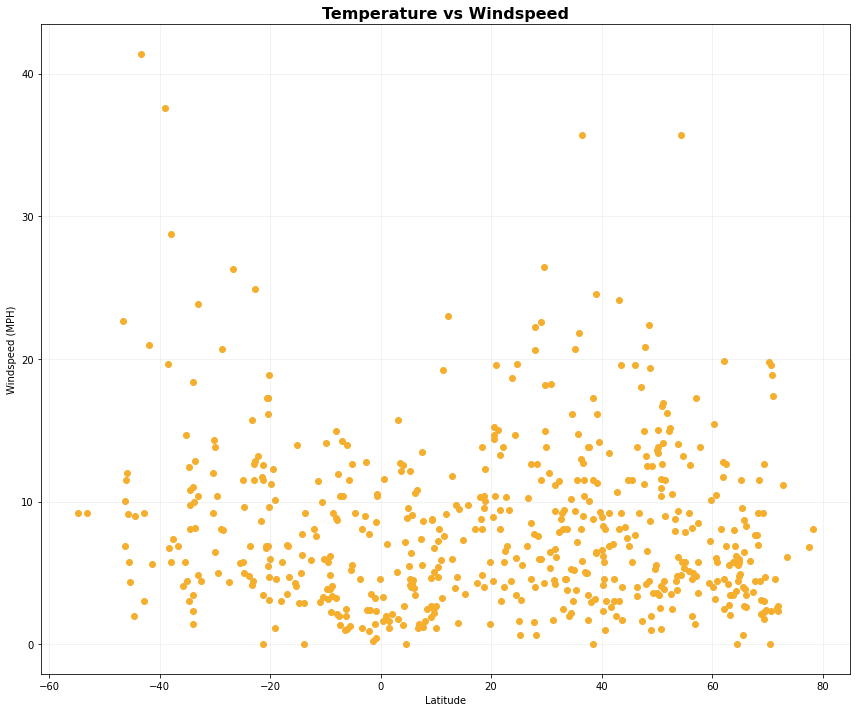

In [26]:
# Latitude vs. Tempertature
plt.figure(figsize=(12,10))

plt.scatter(cities_df.Latitude, cities_df.Wind_Speed, color="#F6AE2D")

plt.title("Temperature vs Windspeed", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Windspeed (MPH)")

plt.grid(axis="both", alpha=0.2)

plt.tight_layout()
plt.savefig("Lat_V_WindSpd.png")
plt.show()

There is a cluster at higher Latitude locations, this is shown with the cluster of data points with windspeeds greater than
0 degrees.

# Linear Regression 

In [27]:
 # Linear Modelling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [28]:
# Create a Northern Hempisphere Dataframe and a Southern Hemisphere Dataframe, doing this will make the process of
# running my linear regressions more efficient.

cities_df_north = cities_df_sub.loc[cities_df_sub.Latitude >= 0]
cities_df_south = cities_df_sub.loc[cities_df_sub.Latitude < 0]

In [29]:
cities_df_north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 566
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         400 non-null    object 
 1   Country      400 non-null    object 
 2   Latitude     400 non-null    float64
 3   Longitude    400 non-null    float64
 4   Date         400 non-null    float64
 5   Wind_Speed   400 non-null    float64
 6   Pressure     400 non-null    float64
 7   Humidity     400 non-null    float64
 8   Temperature  400 non-null    float64
 9   Cloudiness   400 non-null    float64
dtypes: float64(8), object(2)
memory usage: 34.4+ KB


In [30]:
cities_df_south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 1 to 567
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         168 non-null    object 
 1   Country      168 non-null    object 
 2   Latitude     168 non-null    float64
 3   Longitude    168 non-null    float64
 4   Date         168 non-null    float64
 5   Wind_Speed   168 non-null    float64
 6   Pressure     168 non-null    float64
 7   Humidity     168 non-null    float64
 8   Temperature  168 non-null    float64
 9   Cloudiness   168 non-null    float64
dtypes: float64(8), object(2)
memory usage: 14.4+ KB


# Northern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.7229369156209872


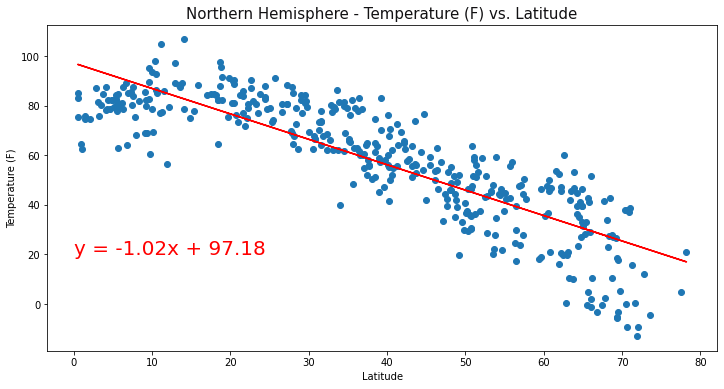

In [31]:
plt.figure(figsize=(12,6))
x_values = cities_df_north['Latitude']
y_values = cities_df_north['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(0,20),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

print(f"The r-squared is: {rvalue**2}")

plt.savefig("FIG 1. Northern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

The trend shows that temperature decreases the further away we are from the equator. The R-squared shows strong predictive value, I would add Temperature in a City Temperature model.

#  Southern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.6007676666129794


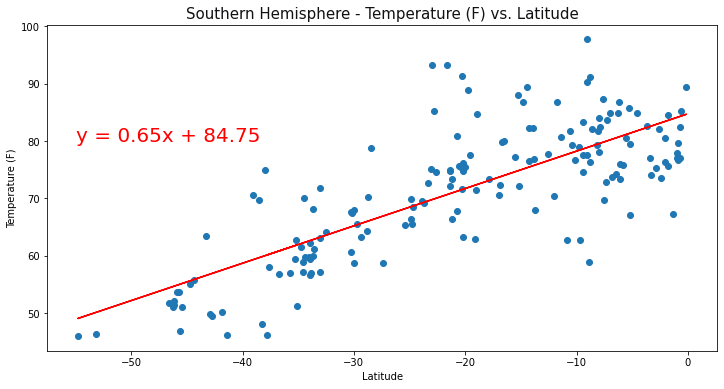

In [32]:
plt.figure(figsize=(12,6))
x_values = cities_df_south['Latitude']
y_values = cities_df_south['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(-55,80),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2. Southern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

As we move closer to the equator from the Southern Hemisphere, temperature increases. The R-squared shows moderaate predictive value, I would add Temperature in a City Temperature model.

# Northern Hemisphere - Humidity (%) vs. Latitude 

The r-squared is: 0.07070432614491334


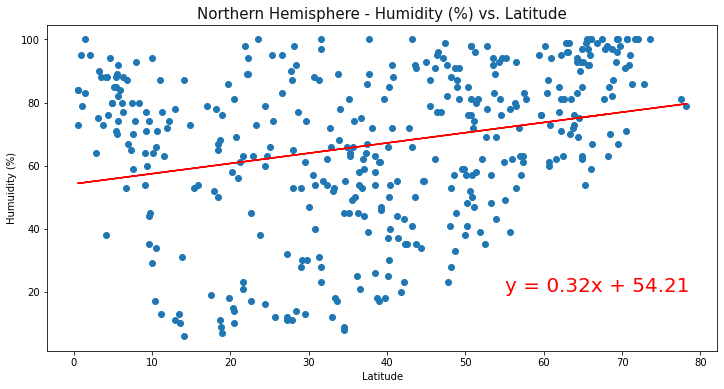

In [33]:
plt.figure(figsize=(12,6))
x_values = cities_df_north['Latitude']
y_values = cities_df_north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(55,20),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humuidity (%)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 3. Northern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

The Northern Hemisphere is more humid than the Southern Hemisphere. However, the Northern Hemisphere cities are above 60% humidity. The R-squared does not show strong predictive value.

#  Southern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.011342837947104199


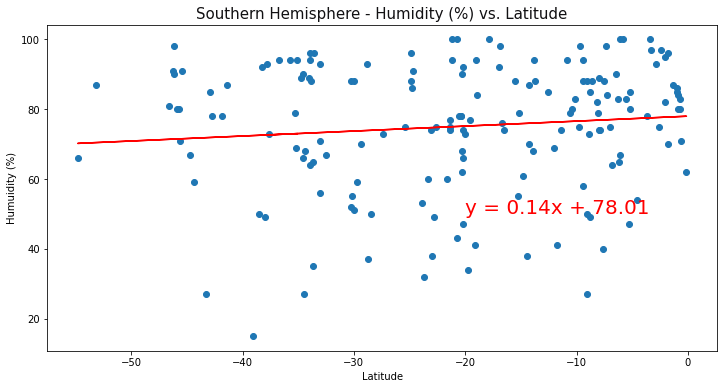

In [34]:
plt.figure(figsize=(12,6))
x_values = cities_df_south['Latitude']
y_values = cities_df_south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(-20,50),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humuidity (%)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 4. Southern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

As we move closer to the equator, Humidity levels increase. The R-squared does not show strong predictive value.

#  Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.02873748181063096


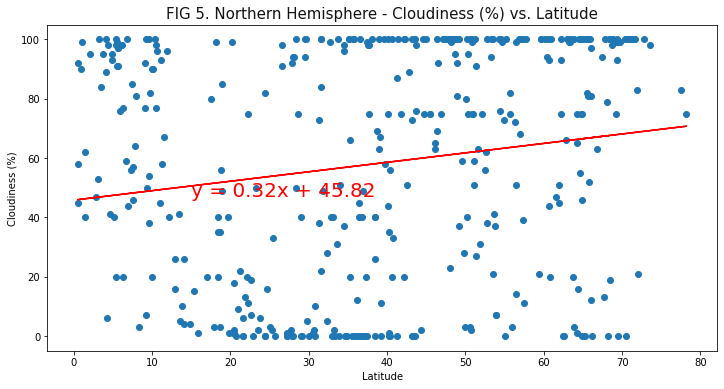

In [35]:
plt.figure(figsize=(12,6))
x_values = cities_df_north['Latitude']
y_values = cities_df_north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('FIG 5. Northern Hemisphere - Cloudiness (%) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(15,47),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 5. Northern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

Visually, this model has traits of heteroscedasticity. The distance each variable has from the fitted model is disconcerting. I would need to run the Mean Absolute Error model to qauntify the Mean Absolute Error value.

#  Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.026535616662208945


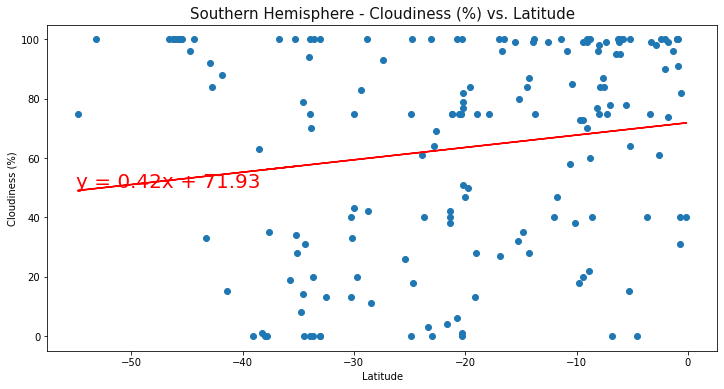

In [36]:
plt.figure(figsize=(12,6))
x_values = cities_df_south['Latitude']
y_values = cities_df_south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(-55,50),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 6. Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

This model also has visual traits of heteroscedaticity.

#  Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 0.0003591231595689166


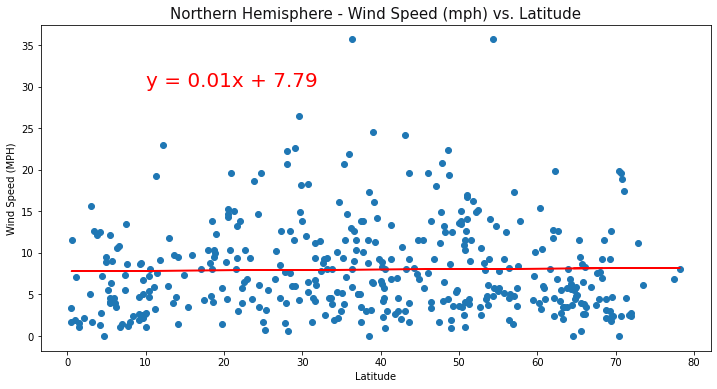

In [37]:
plt.figure(figsize=(12,6))
x_values = cities_df_north['Latitude']
y_values = cities_df_north['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(10,30),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 7. Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()

This model has outlier but I would qualify those as outliers. The fitted line shows signs of homoscedaticity, this is a trait that is highly valued. 

#  Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 0.11164596095211898


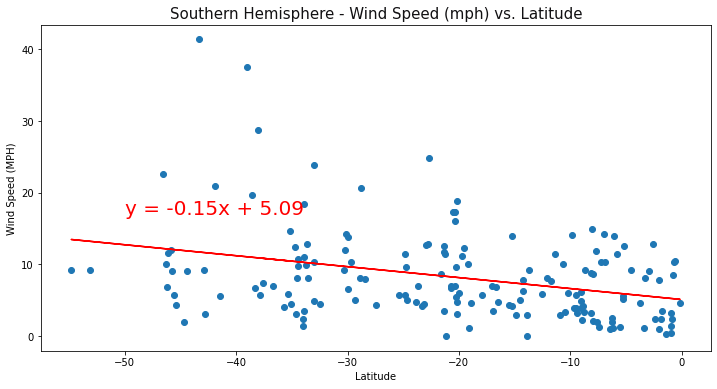

In [38]:
plt.figure(figsize=(12,6))
x_values = cities_df_south['Latitude']
y_values = cities_df_south['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude',fontsize = 15, color = "#121113")
plt.annotate(line_eq,(-50,17),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 8. Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()

This model is a poor predictor. There are signs of heteroscedastic, moderate signs. Also, there is an observable negative trend; as one moves North from the Southern Hemisphere towards the euqator - wind speeds are decreasing.

In [39]:
# Correlation Matrix
cities_df.corr()

corrs = cities_df.corr()

corrs

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
Latitude,1.000000,-0.101198,0.080122,-0.064906,0.297157,0.004608,-0.581857,0.055745
Longitude,-0.101198,1.000000,0.118732,-0.202592,-0.177325,0.229903,-0.138597,0.176233
Date,0.080122,0.118732,1.000000,-0.040464,-0.071576,-0.088374,0.040076,0.093466
Wind_Speed,-0.064906,-0.202592,-0.040464,1.000000,-0.068090,-0.172848,0.096458,-0.114500
Pressure,0.297157,-0.177325,-0.071576,-0.068090,1.000000,0.104383,-0.328609,-0.110304
Humidity,0.004608,0.229903,-0.088374,-0.172848,0.104383,1.000000,-0.391189,0.361644
Temperature,-0.581857,-0.138597,0.040076,0.096458,-0.328609,-0.391189,1.000000,-0.201457
Cloudiness,0.055745,0.176233,0.093466,-0.114500,-0.110304,0.361644,-0.201457,1.000000


[]

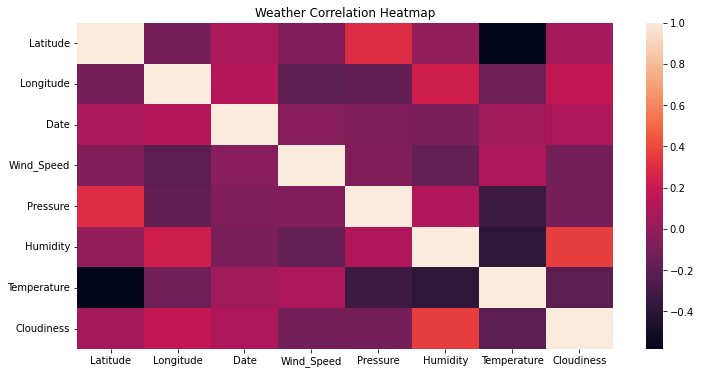

In [40]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corrs)

plt.title('Weather Correlation Heatmap')
plt.savefig("FIG 9. Weather Correlation Heatmap.png")
plt.plot()